# Exercises in neural network and deep learning II

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

from tensorflow import keras
from tensorflow.keras import layers


In [129]:
titanic = pd.read_csv('titanic_survival_data.csv')
adult = pd.read_csv('adult.csv')
ames = pd.read_csv('AmesHousing.csv')

## Exercise 1

In this exercise, we will use the titanic dataset to build a neural network classifier for the target variable `Survived`. In this exercise, all the necessary steps are broken down to small individual task you should do. So, do the following tasks:

1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.
2. For the columns "Age" and "Fare", replace the missing values with the column's mean.
3. Turn the variables "Pclass" and "Sex" into dummy variables.
4. Do a train-test split of the data
5. Scale the X training dataset, using the standard scaler.
6. Transform the X test dataset with the same scaler fitted in task 5.
7. Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.
8. Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.
9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.
10. Plot the training and validation loss and decide on a best number of epochs.
11. Rebuild and retrain the model for the number of epochs decided in task 10 above.
12. Evaluate the model on the test dataset to get the test accuracy.
13. Calculate precision, recall, and f1-score for the model on the test dataset.
14. Plot the Confusion matrix for the test dataset.

In [130]:


titanic_x = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
titanic_y = titanic['Survived']

titanic_x.loc[:, 'Age'] = titanic_x['Age'].fillna(titanic_x['Age'].mean())
titanic_x.loc[:, 'Fare'] = titanic_x['Fare'].fillna(titanic_x['Fare'].mean())

titanic_x = pd.get_dummies(titanic_x, columns=['Pclass', 'Sex'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

titanic_x.info()
titanic_x.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Pclass_2  891 non-null    bool   
 3   Pclass_3  891 non-null    bool   
 4   Sex_male  891 non-null    bool   
dtypes: bool(3), float64(2)
memory usage: 16.7 KB


,Age,Fare,Pclass_2,Pclass_3,Sex_male
0,22.0,7.250,False,True,True
1,38.0,712.833,False,False,False


In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [132]:
history = model.fit(X_train_scaled,
                    y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 0s 9ms/step - loss: 0.6318 - accuracy: 0.6678 - val_loss: 0.5728 - val_accuracy: 0.7203
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.6749 - val_loss: 0.5508 - val_accuracy: 0.7273
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6801 - val_loss: 0.5348 - val_accuracy: 0.7622
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7258 - val_loss: 0.5204 - val_accuracy: 0.7972
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7487 - val_loss: 0.5090 - val_accuracy: 0.7902
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7592 - val_loss: 0.4993 - val_accuracy: 0.8182
Epoch 7/50
9/9 [==============================] - 0s 2ms/step - loss: 0.5461 - accuracy: 0.7750 - val_loss: 0.4895 - val_accuracy: 0.8252
Epoch 8/50
9/9 [==================

In [133]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 16)                96        
                                                                 
 dense_106 (Dense)           (None, 16)                272       
                                                                 
 dense_107 (Dense)           (None, 1)                 17        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


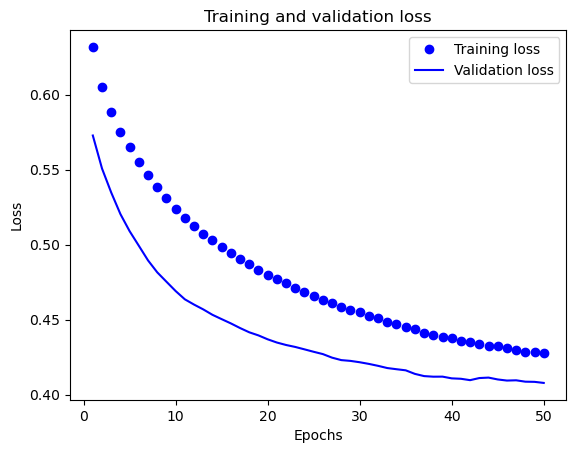

In [134]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [135]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=18,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/18
9/9 [==============================] - 0s 8ms/step - loss: 0.6634 - accuracy: 0.6749 - val_loss: 0.6176 - val_accuracy: 0.7972
Epoch 2/18
9/9 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7346 - val_loss: 0.5935 - val_accuracy: 0.8042
Epoch 3/18
9/9 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7540 - val_loss: 0.5733 - val_accuracy: 0.8112
Epoch 4/18
9/9 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7627 - val_loss: 0.5540 - val_accuracy: 0.8112
Epoch 5/18
9/9 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7821 - val_loss: 0.5355 - val_accuracy: 0.8182
Epoch 6/18
9/9 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7856 - val_loss: 0.5189 - val_accuracy: 0.8252
Epoch 7/18
9/9 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7856 - val_loss: 0.5038 - val_accuracy: 0.8252
Epoch 8/18
9/9 [==================

In [136]:
results = model.evaluate(X_test_scaled, y_test)
print('test loss, test acc:', results)

y_pred = model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

6/6 [==============================] - 0s 596us/step - loss: 0.4632 - accuracy: 0.7877
test loss, test acc: [0.4631870985031128, 0.7877094745635986]
6/6 [==============================] - 0s 426us/step
Precision: 0.7571428571428571
Recall: 0.7162162162162162
F1 Score: 0.7361111111111112


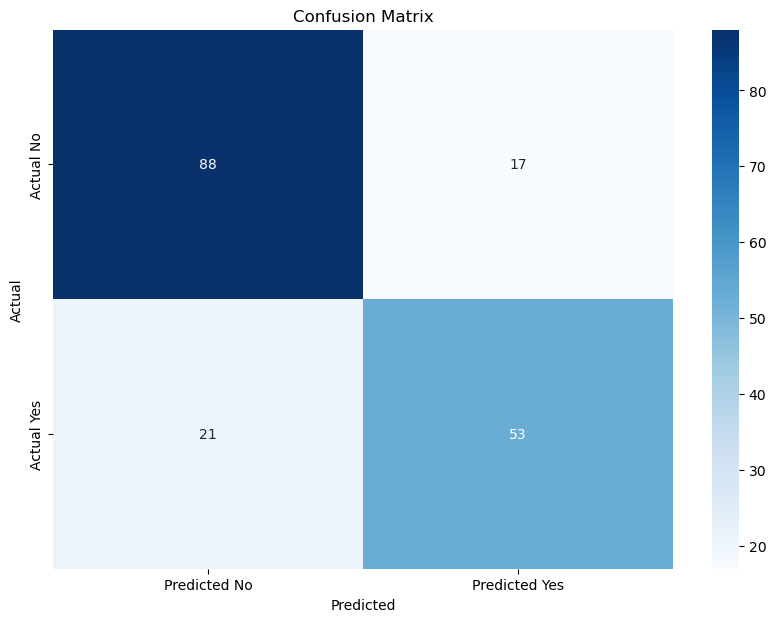

In [137]:
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [138]:
adult_df = adult.dropna()

adult_x = adult_df[['age', 'workclass', 'education-num', 'hours-per-week', 'race', 'sex']]

adult_x.loc[:, 'age_bins'] = pd.cut(adult_x['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
adult_x.loc[:, 'hours_per_week_bins'] = pd.cut(adult_x['hours-per-week'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

adult_y = adult_df['income']
adult_y = adult_y.replace({'<=50K.': '<=50K', '>50K.': '>50K'})
adult_y = adult_y.replace({'<=50K': 0, '>50K': 1})

adult_x = pd.get_dummies(adult_x, columns=['age', 'workclass', 'education-num', 'hours-per-week', 'race', 'sex', 'age_bins', 'hours_per_week_bins'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(adult_x, adult_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


display(adult_y.value_counts())
display(adult_x.head(5))
display(y_train)
print(adult_x.info())
print(adult_y.info())




/var/folders/yq/94jp9phd29s5g98ng2hwj0000000gn/T/ipykernel_53686/1769066790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_x.loc[:, 'age_bins'] = pd.cut(adult_x['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
/var/folders/yq/94jp9phd29s5g98ng2hwj0000000gn/T/ipykernel_53686/1769066790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_x.loc[:, 'hours_per_week_bins'] = pd.cut(adult_x['hours-per-week'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20'

income
0    36080
1    11541
Name: count, dtype: int64

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,race_White,sex_Male,age_bins_21-40,age_bins_41-60,age_bins_61-80,age_bins_81-100,hours_per_week_bins_21-40,hours_per_week_bins_41-60,hours_per_week_bins_61-80,hours_per_week_bins_81-100
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


array([0, 0, 1, ..., 0, 0, 0])

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Columns: 204 entries, age_18 to hours_per_week_bins_81-100
dtypes: bool(204)
memory usage: 9.6 MB
None
<class 'pandas.core.series.Series'>
Index: 47621 entries, 0 to 48841
Series name: income
Non-Null Count  Dtype
--------------  -----
47621 non-null  int64
dtypes: int64(1)
memory usage: 744.1 KB
None


In [139]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/50
477/477 [==============================] - 1s 616us/step - loss: 0.4832 - accuracy: 0.7621 - val_loss: 0.4316 - val_accuracy: 0.7907
Epoch 2/50
477/477 [==============================] - 0s 475us/step - loss: 0.4294 - accuracy: 0.7955 - val_loss: 0.4191 - val_accuracy: 0.8008
Epoch 3/50
477/477 [==============================] - 0s 476us/step - loss: 0.4193 - accuracy: 0.8021 - val_loss: 0.4138 - val_accuracy: 0.8035
Epoch 4/50
477/477 [==============================] - 0s 473us/step - loss: 0.4149 - accuracy: 0.8067 - val_loss: 0.4116 - val_accuracy: 0.8055
Epoch 5/50
477/477 [==============================] - 0s 475us/step - loss: 0.4117 - accuracy: 0.8086 - val_loss: 0.4085 - val_accuracy: 0.8088
Epoch 6/50
477/477 [==============================] - 0s 609us/step - loss: 0.4100 - accuracy: 0.8105 - val_loss: 0.4073 - val_accuracy: 0.8113
Epoch 7/50
477/477 [==============================] - 0s 477us/step - loss: 0.4082 - accuracy: 0.8106 - val_loss: 0.4074 - val_accuracy:

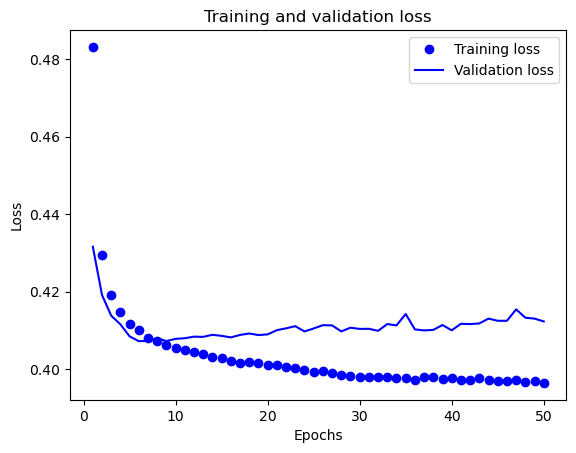

In [140]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [141]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=8,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/8
477/477 [==============================] - 1s 630us/step - loss: 0.4882 - accuracy: 0.7626 - val_loss: 0.4365 - val_accuracy: 0.7993
Epoch 2/8
477/477 [==============================] - 0s 478us/step - loss: 0.4291 - accuracy: 0.7986 - val_loss: 0.4172 - val_accuracy: 0.8060
Epoch 3/8
477/477 [==============================] - 0s 490us/step - loss: 0.4173 - accuracy: 0.8053 - val_loss: 0.4111 - val_accuracy: 0.8083
Epoch 4/8
477/477 [==============================] - 0s 486us/step - loss: 0.4124 - accuracy: 0.8066 - val_loss: 0.4081 - val_accuracy: 0.8127
Epoch 5/8
477/477 [==============================] - 0s 483us/step - loss: 0.4098 - accuracy: 0.8103 - val_loss: 0.4073 - val_accuracy: 0.8127
Epoch 6/8
477/477 [==============================] - 0s 489us/step - loss: 0.4079 - accuracy: 0.8103 - val_loss: 0.4064 - val_accuracy: 0.8139
Epoch 7/8
477/477 [==============================] - 0s 487us/step - loss: 0.4071 - accuracy: 0.8115 - val_loss: 0.4079 - val_accuracy: 0.8117

In [142]:
results = model.evaluate(X_test_scaled, y_test)
print('test loss, test acc:', results)

y_pred = model.predict(X_test_scaled)

y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

298/298 [==============================] - 0s 289us/step - loss: 0.4180 - accuracy: 0.8035
test loss, test acc: [0.4180000126361847, 0.8034645915031433]
298/298 [==============================] - 0s 261us/step
Precision: 0.641808573106283
Recall: 0.46411889596602973
F1 Score: 0.5386890093642188


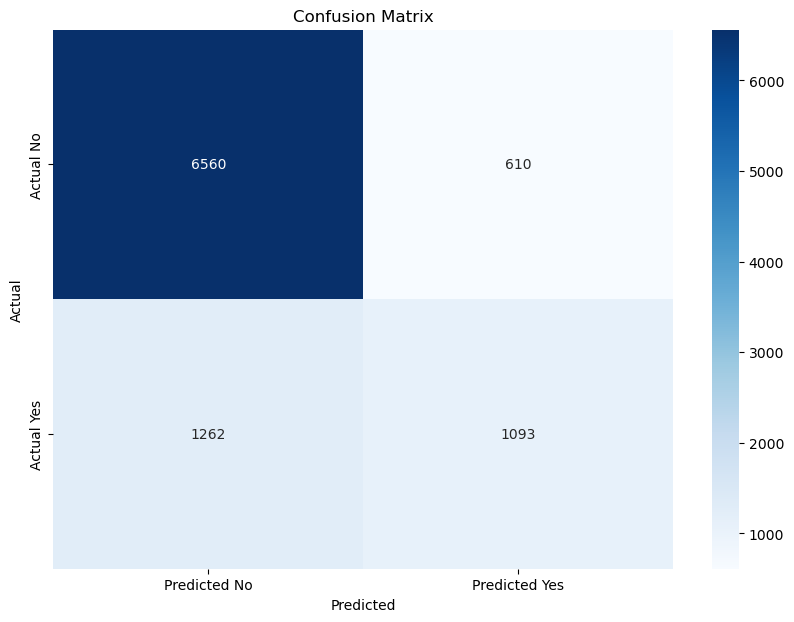

In [143]:
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Exercise 3

Based on the **AmesHousing dataset** from the class on regression, make a deep learning regression model to predict the sales price variable.

In [144]:
ames.info()
X_ames = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd","Pool Area","MS SubClass"]]
y = ames[["SalePrice"]]

X_ames['Year Built Bins'] = pd.cut(X_ames['Year Built'], bins=[1870, 1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=['1870-1900', '1901-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020'])
X_ames = pd.get_dummies(X_ames, columns=['MS SubClass', 'Year Built Bins'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_ames, y, test_size=0.2, random_state=42)


display(X_ames.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

/var/folders/yq/94jp9phd29s5g98ng2hwj0000000gn/T/ipykernel_53686/4179730532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ames['Year Built Bins'] = pd.cut(X_ames['Year Built'], bins=[1870, 1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=['1870-1900', '1901-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2020'])


,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Pool Area,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,...,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,Year Built Bins_1901-1920,Year Built Bins_1921-1940,Year Built Bins_1941-1960,Year Built Bins_1961-1980,Year Built Bins_1981-2000,Year Built Bins_2001-2020
0,31770,5,1960,1656,7,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,11622,6,1961,896,5,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,14267,6,1958,1329,6,0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,11160,5,1968,2110,8,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,13830,5,1997,1629,6,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/50
30/30 [==============================] - 0s 3ms/step - loss: 37743607808.0000 - mae: 178204.2812 - val_loss: 38209310720.0000 - val_mae: 180085.2344
Epoch 2/50
30/30 [==============================] - 0s 923us/step - loss: 37742759936.0000 - mae: 178201.9062 - val_loss: 38208098304.0000 - val_mae: 180081.9062
Epoch 3/50
30/30 [==============================] - 0s 896us/step - loss: 37741166592.0000 - mae: 178197.5156 - val_loss: 38205865984.0000 - val_mae: 180075.9531
Epoch 4/50
30/30 [==============================] - 0s 875us/step - loss: 37738311680.0000 - mae: 178189.8750 - val_loss: 38202015744.0000 - val_mae: 180065.8438
Epoch 5/50
30/30 [==============================] - 0s 876us/step - loss: 37733703680.0000 - mae: 178177.5312 - val_loss: 38196125696.0000 - val_mae: 180050.5000
Epoch 6/50
30/30 [==============================] - 0s 980us/step - loss: 37726855168.0000 - mae: 178159.4531 - val_loss: 38187540480.0000 - val_mae: 180028.4062
Epoch 7/50
30/30 [============

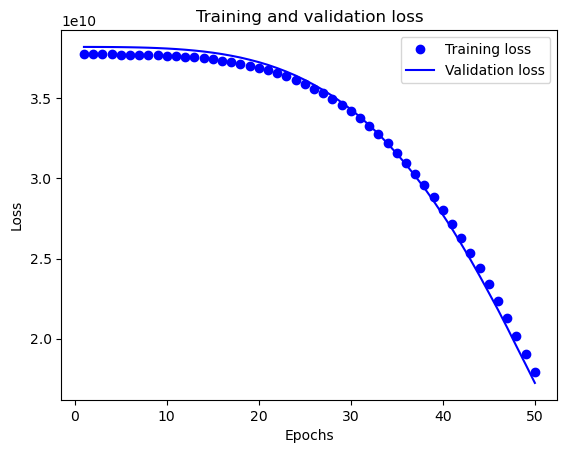

In [146]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["mae"])

history = model.fit(X_train_scaled,
                    y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/30
30/30 [==============================] - 0s 3ms/step - loss: 37743366144.0000 - mae: 178203.4844 - val_loss: 38208839680.0000 - val_mae: 180083.7812
Epoch 2/30
30/30 [==============================] - 0s 1ms/step - loss: 37742047232.0000 - mae: 178199.8281 - val_loss: 38206988288.0000 - val_mae: 180078.8125
Epoch 3/30
30/30 [==============================] - 0s 1ms/step - loss: 37739614208.0000 - mae: 178193.4062 - val_loss: 38203674624.0000 - val_mae: 180070.1875
Epoch 4/30
30/30 [==============================] - 0s 963us/step - loss: 37735456768.0000 - mae: 178182.6719 - val_loss: 38198403072.0000 - val_mae: 180056.7344
Epoch 5/30
30/30 [==============================] - 0s 956us/step - loss: 37729046528.0000 - mae: 178166.3125 - val_loss: 38190329856.0000 - val_mae: 180036.6406
Epoch 6/30
30/30 [==============================] - 0s 956us/step - loss: 37719478272.0000 - mae: 178142.5000 - val_loss: 38178750464.0000 - val_mae: 180008.1875
Epoch 7/30
30/30 [================